In [1]:
#【案例】信用卡欺诈检测 (线性回归、逻辑回归案例)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
#==【打开数据】==
crdDatas = pd.read_csv('creditcard.csv')
crdDatas.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


'''
分析下：
Time不要
v1 v2 ...v28不知道是什么含义，
这是降维过了，把特征压缩过的（为了保密）
也就是特征提取好了。

本例看下对提取好的特征怎样处理建模

Amount看下
取值范围大，需对它预处理。

怎么处理数据？
分类：二分类
0正常，1异常

用逻辑回归做二分类任务

先看下数据有没有问题、样本分布规则

实际中肯定是正常的多，异常的少
，所以先算下数据是否均恒的

class列 0 1 代表正常异常
其它列 为x特征数据（输入数据），
class做y结果 label数据（结果数据，用于验证或测试）

'''


0    284315
1       492
Name: Class, dtype: int64
<class 'pandas.core.series.Series'>


Text(0,0.5,'Frequency')

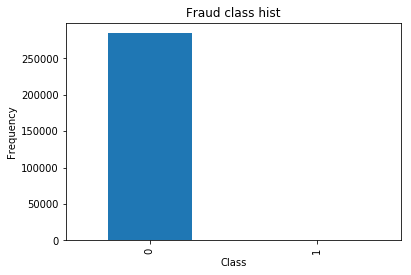

In [3]:
#==【画出来，看看正负样表的比例】==
count_classes = pd.value_counts(crdDatas['Class'],sort=True).sort_index()
#count_classes = pd.value_counts(crdDatas['Class'])
print(count_classes)
print(type(count_classes))
#输出每个值的个数相关的一个数据序列Series
count_classes.plot(kind='bar')
#pandas也可以画简单图 用数据个数序列类对象.plot画出即可，参数为图标类型
plt.title('Fraud class hist')
plt.xlabel('Class')
plt.ylabel('Frequency')

'''
#==样本不均衡不规则怎么办==

方案：过采样，下采样

下采样，同样少，让0和1一样小，比如让0的样本也几百个，和1一样。
过采样，同样多，给1中生成一些20多万个，和0一样多。
'''

'''
#==【amount 差异处理：】==
做一个相同的归一化，
或标准化

可以把数据
做到0-1或0到-1的区间上，

'''

In [4]:
#用sklearn预处理标准化模块
#sklearn.preprocessing 的StandardScaler
from sklearn.preprocessing import StandardScaler

crdDatas['normAmount'] = StandardScaler().fit_transform(crdDatas['Amount'].values.reshape(-1,1))                                          
#fit_transform对数据变换
#注意参考答案有改动，是.values.reshpape(-1,1)重组矩阵
#并加入新特征列，命名为normAmount
crdDatas = crdDatas.drop(['Time','Amount'],axis=1)
#drop掉旧的和没用的列
crdDatas.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
#==【处理样本不平衡（Class 输出结果y label列 0 多 1少问题）
#方案一：下采样：让两列一样少】==

#切分数据为x y 
X = crdDatas.ix[:,crdDatas.columns != 'Class']#所有行，列按条件过滤
y = crdDatas.ix[:,crdDatas.columns == 'Class']
#print(X)
#print(y)
#【loc从索引中获取具有特定标签([元素内容])的行（或列）
#iloc在索引中的特定位置(如[行号])获取行（或列）（因此它只接受整数）
#ix 切分序列定位，接受整数和字符串及条件等过滤
#参考https://blog.csdn.net/anshuai_aw1/article/details/82801435】
#x 是特征列，除了Class列， != class
#y 是结果label列，即Class列， == class

num_1 = len(crdDatas[crdDatas.Class == 1])
#print(crdDatas[crdDatas.Class == 1])
#class==1的样本个数,
#crdDatas[crdDatas.Class == 1]过滤class == 1的数据
indexArr_1 = np.array(crdDatas[crdDatas.Class == 1].index)
#print(indexArr_1)
#Class为1的索引号行号放入数组(np.array 转成数组格式)
indexs_0 = crdDatas[crdDatas.Class == 0].index
#print(indexs_0)
#Class为0的索引号行号

#把Class==0的多的数据随机选出一些，与Class==1的等量均衡
indexs_0_random = np.random.choice(indexs_0,num_1,replace = False)
#参数：从哪选，多少个， replace不代替
indexArr_0_random = np.array(indexs_0_random)
#print(indexArr_0_random)
#选好的indexs放入数组(np.array 转成数组格式)

#把1和选好的0合并，组合成下采样索引(行号)，用于取下采样数据
#（【注意：看到没，要取数据，索引先行，这是pandas的特点，学会巧妙利用这点，
#先把索引计算好，数据就出来了】）
under_datas_indexs = np.concatenate([indexArr_1,indexArr_0_random])
#根据索引用iloc行号定位取得（过滤到）数据
#(【索引处理好后从原数据再过滤得到，这样批量的一般都这样，
#黎明的量化交易那个只是单纯的做一列判断不需要这样，效率浪费了感觉】)
under_datas = crdDatas.iloc[under_datas_indexs,:]
#取上面行号所在的所有列

#再分出X和y
X_under_datas = under_datas.ix[:,under_datas.columns != 'Class']
y_under_datas = under_datas.ix[:,under_datas.columns == 'Class']

#打印看下
print("正常刷卡百分比：",len(under_datas[under_datas.Class == 0])/len(under_datas))
print("异常刷卡百分比：",len(under_datas[under_datas.Class == 1])/len(under_datas))
print("下采样重组数据后的总交易（刷卡）数：",len(under_datas))
#由打印可知，各占50%，均衡了，总数984

正常刷卡百分比： 0.5
异常刷卡百分比： 0.5
下采样重组数据后的总交易（刷卡）数： 984


G:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
G:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
G:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
G:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: Depreca

'''
#==【交叉验证】==

train和test
train部分的数据随机替换切分交替使用
数据少时用

这样取到的参数准一些

如：train 1,2,训练model，3验证集
train 1,3,训练，2验证集
train 3,2,训练，1验证集

这样三次使用，平稳一些

1+2+3/3 最后评估下

算法有很多，参数最难选
所以通过这个找到合理的参数
'''

In [7]:
#==【交叉验证】==
#库用cross_validation的train_test_split
from sklearn.cross_validation import train_test_split

#先对原始的split 交叉验证，虽不用于训练，但要用来做最后的测试
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#test_size = 0.3 30%做训练集
#train test切分之前都会洗牌
#random_state=0 随机状态让train和test比例不变
print("训练集交易量（刷卡数）：",len(X_train))
print("测试集交易量（刷卡数）：",len(X_test))
print("交易总数：",len(X_train)+len(X_test))

训练集交易量（刷卡数）： 199364
测试集交易量（刷卡数）： 85443
交易总数： 284807


In [8]:
#对下采样数据进行split交叉验证
X_train_under,X_test_under,y_train_under,y_test_under = train_test_split(X_under_datas
                                                                         ,y_under_datas
                                                                         ,test_size=0.3
                                                                         ,random_state=0)
print("==下采样数据集==")
print("训练集交易量（刷卡数）：",len(X_train_under))
print("测试集交易量（刷卡数）：",len(X_test_under))
print("交易总数：",len(X_train_under)+len(X_test_under))

==下采样数据集==
训练集交易量（刷卡数）： 688
测试集交易量（刷卡数）： 296
交易总数： 984


'''
#==【上面数据分完了，就可以用于下面用逻辑回归进行建模操作】==
想一下模型的评估标准

看下真实值和预测值是不是一样

model会把所有样本都预测成正样本
一个应该有的异常都没找到也是不对的。

精度评估通常有些骗人，尤其样本不均衡时。

用recall招回率
根据目标制定标准
看检测出来需要的数的率 recall率，查权率？

比如查癌症病人为例，要查出10个看查出几个/10，这个准备率，
而不是99%个没病的。精度再高也没用

【模型评估标准比建模型还要重要
因为建模型无非就是为了选择一些参数
这个参数就是效果，展示给领导看的，
】
只用精度或recall不是那么容易说服，
所以有几个指标：
TP true/positive 预测为T真/（斜线代表同时满足） 正例 把正例判断为正例 （比如80人中找到所有女生，有人挑出50人里面有20个女生30个男生 TP=20 即有20个是把正例判断为正例的）
FP false/positive 判断为F假/正例 错判断成了一个正例（FP = 30 即有30个错判成正例了，男生当女生了）
FN false/negative 判断为F假/负例 F && F = T 假假为真 （没有把女生当成男生 FN = 0 没有一个错判女生为男生 ）
TN true/negative 判断为T真/负例 有50个 把男生判断成了男生  TN = 50

Recall = TP/(TP+FN)
#代入找出10个癌症病人实例就是:预测为T真 &癌症 / （预测为T真 & 癌症 + 预测为F假&非癌症  F && F = T）

【以上可理解为F T真假条件的组合】
'''

In [9]:
#Recall = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report
#库
#linear_model LogisticRegression 逻辑回归
#KFold 用于在交叉验证的时候做几倍的交叉验证
#上面的切分是3份，也可以切成多份
#cross_val_score评估的结果
#confusion_matrix混淆矩阵,用于算Recall率

In [10]:
def print_kfold_scores(x_train_data,y_train_data):
    #实例化交叉验证类
    fold = KFold(len(y_train_data),5,shuffle=False)
    #交叉验证:以结果集算总长度？切5份，不洗牌
    
    c_param_list = [0.01,0.1,1,10,100]
    #指定参数，不同的正则化惩罚项
    '''
    浮动范围大，要惩罚，要求范化更强，更平稳
    过拟和在测试集不准，就是因为浮动大。

    L2正则化：
    loss损失函数+惩罚项1 w^2 / 2
    要更低的loss
向量中各元素绝对值的和。作用是产生少量的特征，而其他的特征都是0，常用于特征选择； 
    L1：
    loss + |w|
向量中各元素绝对值的和。作用是产生少量的特征，而其他的特征都是0，常用于特征选择； 
    设置惩罚力度,即 参数列表 c_param_range
    看哪个好
    '''
    
    #可视化显示DataFrame格式
    rs_table = pd.DataFrame(index = range(len(c_param_list),2),
                            columns= ['C_param','未用Recall_m'])

    rs_table['C_param'] = c_param_list
    
    #遍历惩罚项参数，找最好的参数
        #内循环交叉验证
    j = 0#循环计数器？
    for c_param in c_param_list:
        print("----------")
        print("C param:", c_param)
        print("----------")
        print("")
        
        #内循环交叉验证 fold 上面实例化的交叉验证fold对象，已分好5份
        recall_sc_list = []
        for n,indexs in enumerate(fold,start=1):
            #n是enumerate生成的fold项的编号，indexs是fold的每一项内容（每一份数据）
            #实例化逻辑回归模型
            lr = LogisticRegression(C = c_param, penalty = 'l1')
            #C 目标函数的约束条件 如：惩罚项<C, C值越小，则正则化强度越大。
            #penalty 惩罚项 L1 ,L2 不是11注意
            #L1：绝对值的和。作用产生少量的特征，其他的特征都是0，常用于特征选择； 
            #L2：各个元素平方之和再开根号。作用选择较多的特征，使他们都趋近于0；
            
            #开始训练，Class==0的训练集
            lr.fit(x_train_data.iloc[indexs[0],:],
                   y_train_data.iloc[indexs[0],:].values.ravel())
            #iloc[indexs[0],:]定位过滤索引为0的所有行数据的所有列，也就是训练集
            #fit(X特征，y label)
            #.ravel()将数组降到一维
            
            #预测验证
            #取训练集中的的Class==1的预测结果，用于和真实值比较（值的比较，所以行号取到.values）
            y_pred_under = lr.predict(x_train_data.iloc[indexs[1],:].values)
            
            #预测的为1，真实的为1则对，算准确率，用函数recall_score自动黑箱完成
            recall_sc = recall_score(y_train_data.iloc[indexs[1],:].values,
                                    y_pred_under)
            #参数：训练集中的真实值Class==1的，和预测的Class==1的比对，正确了则计分 
            recall_sc_list.append(recall_sc)
            #append到计分列表，用于展示
            
            #打印每次交叉验证的recall值，看哪些参数的recall招回率高哪些低
            print('循环迭代次数： ', n,': recall score = ', recall_sc)
        
        #计算、打印算平均值
        #平均值放入rs_table一份用于展示
        rs_table.ix[j,'Recall_m'] = np.mean(recall_sc_list)
        #此处的Recall_m也可给rs_table加新列，
        #但和初始化时重名则取不到idxmax()？但验证取的对，
        #改成idxmin()也验证过了,不管它了
        j +=1#忘记加了，所以只累计了一个平均分
        print("")
        print("平均 Recall score:",np.mean(recall_sc_list))
        print("")
    print("==打印rs_table==")    
    print(rs_table)
    #c_param惩罚 取一个最好的c
    best_c = rs_table.loc[rs_table['Recall_m'].idxmax()]['C_param']
    #idxmax()获取最大值的索引值,改成idxmin()测试取最小平均值也正确
    #【过滤行（数据）用loc iloc ix ，过滤列用[索引或条件]】
    #定位到最大平均Recall(本轮招回率平均分最高，则本轮c最好)行取C_param列值，最合适的c
    
    print("交叉验证取得最好模型的最合适c参数(惩罚力度)：",best_c)
    
    return best_c
#【【重大突破：到本例为止已学会调试，以后的案例都要改下变量名和函数名，用自己的思路理一遍】】

In [95]:
#简单数用于测试
#X_train_under2 = [100,200,300]
#y_train_under2 = [1,0,1,0,1,1]
#print_kfold_scores(X_train_under2,y_train_under2)
#testList = [1,0,0,1,0,0,0,1,0]
#for idx,item in enumerate(testList):
#    print(item[0])
    

In [11]:
best_c = print_kfold_scores(X_train_under,y_train_under)
#【取到最合适的C之后，目地是再去建一个模型使用这些选中的最好的参数去预测总数据集，甚至其它的数据】


----------
C param: 0.01
----------

循环迭代次数：  1 : recall score =  0.958904109589041
循环迭代次数：  2 : recall score =  0.9178082191780822
循环迭代次数：  3 : recall score =  1.0
循环迭代次数：  4 : recall score =  0.9594594594594594
循环迭代次数：  5 : recall score =  0.9545454545454546

平均 Recall score: 0.9581434485544076

----------
C param: 0.1
----------

循环迭代次数：  1 : recall score =  0.8493150684931506
循环迭代次数：  2 : recall score =  0.863013698630137
循环迭代次数：  3 : recall score =  0.9152542372881356
循环迭代次数：  4 : recall score =  0.9324324324324325
循环迭代次数：  5 : recall score =  0.8787878787878788

平均 Recall score: 0.8877606631263468

----------
C param: 1
----------

循环迭代次数：  1 : recall score =  0.8493150684931506
循环迭代次数：  2 : recall score =  0.8767123287671232
循环迭代次数：  3 : recall score =  0.9661016949152542
循环迭代次数：  4 : recall score =  0.9459459459459459
循环迭代次数：  5 : recall score =  0.9090909090909091

平均 Recall score: 0.9094331894424765

----------
C param: 10
----------

循环迭代次数：  1 : recall score =  0.8630136986

G:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


 0.9242424242424242

平均 Recall score: 0.9152032185001768

----------
C param: 100
----------

循环迭代次数：  1 : recall score =  0.863013698630137
循环迭代次数：  2 : recall score =  0.8767123287671232
循环迭代次数：  3 : recall score =  0.9661016949152542
循环迭代次数：  4 : recall score =  0.9459459459459459
循环迭代次数：  5 : recall score =  0.9242424242424242

平均 Recall score: 0.9152032185001768

==打印rs_table==
   C_param 未用Recall_m  Recall_m
0     0.01        NaN  0.958143
1     0.10        NaN  0.887761
2     1.00        NaN  0.909433
3    10.00        NaN  0.915203
4   100.00        NaN  0.915203
交叉验证取得最好模型的最合适c参数(惩罚力度)： 0.01


In [12]:
#==【混淆矩阵，用来画TP FN等，计算Recall值】【代入合适的c惩罚系数 评估模型】==
import itertools
def plot_confusion_matrix(cm,classes,
                         title='Confunsion matrix',
                         cmap = plt.cm.Blues):
    #参数：cm用于画图的数据(即混淆矩阵数据集)；
    #classes 统计label结果指标
    #cmap 热力图的颜色，Blues蓝色（热力图 即根据数据大小变不同色度的蓝，一目了然用于分析数据）
    
    #画热力图（混淆矩阵）
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    #interpolation='nearest' 颜色间隔清清晰，不是渐变的 #polation极化作用
    plt.title(title)
    plt.colorbar()
    tick_nums = np.arange(len(classes))#刻度数，同标签指标项数 0,1 两个格
    #tick_nums = 5
    plt.xticks(tick_nums,classes,rotation=0)#参数：刻度数 0 1 两格，标签名字，旋转
    #x轴刻度
    plt.yticks(tick_nums,classes)
    #y轴刻度
    #【注意：热力图的右测颜色渐变刻度是热力图根据数据自动生成划分的，上面是矩阵x轴和y轴分几格】
    
    thresh = cm.max()/2.
    #thresh阈值，sigmoid函数的两个分类分隔点。默认0.5，但可人为调，根据数据
    #此处先看0.5，即数据最大值/2.
    
    #for item in itertools.product([1,2,3],[100,200]):
    #遍历混淆两个数组，item为（1，100）（1，200）（2，100）（2，200）这样两两组合
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    #参数：shape[0]取行，shape[1]取列，cm.【即自身的行和列互相混淆】
        
        #给图添加文本标柱
        plt.text(j,i,cm[i,j],
                horizontalalignment = 'center',
                color='white' if cm[i,j]>thresh else 'black')
        #参数：x,y轴位置；文字内容cm的第i行j列数字；文字垂直居中；颜色 python的三元运算符
    
    plt.tight_layout()
    #调整子图参数,避免叠在一起
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [42]:
#==本cell是临时测试代码用==
#np.arange(n)#np. 生成0到n n-1个数的数组，同python的for的range
#for item in itertools.product(['a','b','c'],[111,222,333]):
#    print(item)
#上面for i,j ...时i为第一数组a,b,c,j分别打印111，222，333
'''
输出：
('a', 111)
('a', 222)
('a', 333)
('b', 111)
('b', 222)
('b', 333)
('c', 111)
('c', 222)
('c', 333)
'''

"\n输出：\n('a', 111)\n('a', 222)\n('a', 333)\n('b', 111)\n('b', 222)\n('b', 333)\n('c', 111)\n('c', 222)\n('c', 333)\n"

In [13]:
#==生成cm画混淆矩阵所需的数据（代入最合适的c）==
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_under,y_train_under.values.ravel())
#fit(x,y)训练模型，x为数据的属性，y为所属类型 ,y_train_under后面的.values.ravel()去掉值也出来了，只是有个小报错。
#即上面y值是每一条数据的Class值数据序列（试了下，加.values也可以……）。.values取出每条对应的1，0值，.ravel纵向数组变成一维横向)。
#print(X_train_under)#下采样交叉验证分得的训练集X特征，
#print(y_train_under)
#print(y_train_under.values.ravel())
y_pred_under = lr.predict(X_test_under.values)
#print(X_test_under.values)
#predict 对数据集预测，所以参数此处用了数据的值？而不是数据序列？后面改成不带.values试下,也可以？
cnf_matrix = confusion_matrix(y_test_under,y_pred_under)
#confusion_matrix 混淆矩阵 也是通过真实值和预测值的依次比较得到，所以
#参数：训练集里的真实值 分出来的真实label y值，训练集里的预测值y，上一步算出的
np.set_printoptions(precision=2)#强制打印效果中间不省略的数据,小数点后保留2位
print("下采样测试数据集招回率：",
     cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
#95%
#TP/(TP+FN) 对应矩阵图上1行1列位置/1行0列+1行一列 也是 真真/假假 + 真真？
#print(cnf_matrix)
#[[129  20]
 #[  7 140]]
#print(cnf_matrix[1,1])#140
#print(cnf_matrix[1,0])#7
#print(cnf_matrix[0,0])#129
#print(cnf_matrix[0,1])#20
#【混淆矩阵参考：
#http://www.cnblogs.com/wuchuanying/p/6243987.html】

下采样测试数据集招回率： 0.9319727891156463


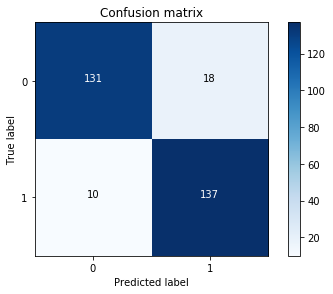

In [14]:
#【代入上面画混淆矩阵函数，画出来看下】
labels = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = labels,title='Confusion matrix')
#参数：数据，分类标签，标题
plt.show()


'''
分析上图
x轴预测值，
y轴真值，
看下它们的差异
140 TP 1 /1 
FN 7 0/1
Recall = TP/TP+FN
90%多

也可以从中看精度 = 129+140/129+140+7+20 (假假+真真)/（假假+真真+真假+假真）(FN+TP)/(FN+TP+FP+TN)
print((129+140)/(129+140+7+20))
#注意，以上数值可能每次执行会有一点点不一样
#90%

'''


原始测试数据集招回率： 0.9183673469387755


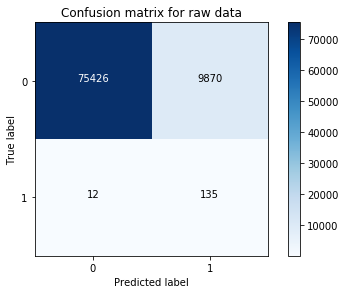

In [15]:
#【但是，注意，上面混淆矩阵 是 对应下采样数据集，小规模测试
#最终要在原始测试集做测试，测全部数据才是最终目的，甚至用于测其它数据】
#即，用train数据fit完以下，predict 和confusion)_matrix的时候改成用整个数据值的测试值进行预测和画图，
#上面用的是下采样数据集测试集x_test_under和结果集y_test_under
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_under,y_train_under.values.ravel())
y_pred = lr.predict(X_test.values)
cnf_matrix_all = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
print("原始测试数据集招回率：",
     cnf_matrix_all[1,1]/(cnf_matrix_all[1,0]+cnf_matrix_all[1,1]))

labels = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_all,classes = labels,title = 'Confusion matrix for raw data')
plt.show()

'''
10083个样本误杀，使精度偏低，工作量也变大了
下采样就存在这样潜在问题，误杀太多。超过容忍范围。比如跟据有问题的给用户打电话，这样就不行，虚惊一场的太多了。

下面看下不用过采样也不用下采样，就用原始数据看下效果
模型效果不好。不均衡的肯定要处理一下。
'''

In [16]:
#先重新算下不用下采样用源始数据的best_c看下
best_c_raw = print_kfold_scores(X_train,y_train)
#招回率很低，40%-60%左右，

----------
C param: 0.01
----------

循环迭代次数：  1 : recall score =  0.4925373134328358
循环迭代次数：  2 : recall score =  0.6027397260273972
循环迭代次数：  3 : recall score =  0.6833333333333333
循环迭代次数：  4 : recall score =  0.5692307692307692
循环迭代次数：  5 : recall score =  0.45

平均 Recall score: 0.5595682284048672

----------
C param: 0.1
----------



G:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


循环迭代次数：  1 : recall score =  0.5671641791044776
循环迭代次数：  2 : recall score =  0.6164383561643836
循环迭代次数：  3 : recall score =  0.6833333333333333
循环迭代次数：  4 : recall score =  0.5846153846153846
循环迭代次数：  5 : recall score =  0.525

平均 Recall score: 0.5953102506435158

----------
C param: 1
----------

循环迭代次数：  1 : recall score =  0.5522388059701493
循环迭代次数：  2 : recall score =  0.6164383561643836
循环迭代次数：  3 : recall score =  0.7166666666666667
循环迭代次数：  4 : recall score =  0.6153846153846154
循环迭代次数：  5 : recall score =  0.5625

平均 Recall score: 0.612645688837163

----------
C param: 10
----------

循环迭代次数：  1 : recall score =  0.5522388059701493
循环迭代次数：  2 : recall score =  0.6164383561643836
循环迭代次数：  3 : recall score =  0.7333333333333333
循环迭代次数：  4 : recall score =  0.6153846153846154
循环迭代次数：  5 : recall score =  0.575

平均 Recall score: 0.6184790221704963

----------
C param: 100
----------

循环迭代次数：  1 : recall score =  0.5522388059701493
循环迭代次数：  2 : recall score =  0.6164383561643836
循环迭代

原始数据集测试招回率： 0.47150259067357514


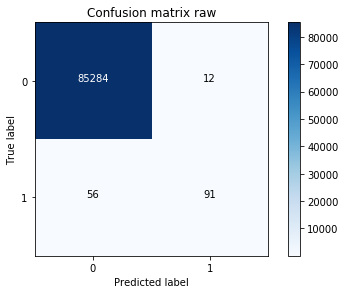

In [17]:
#代入best_c_raw，看用原始数据train和test集 建模评估混淆矩阵效果怎么样
lr = LogisticRegression(C = best_c_raw, penalty ='l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_raw = lr.predict(X_test.values)

cnf_matrix_raw = confusion_matrix(y_test,y_pred_raw)
np.set_printoptions(precision=2)

#打印召回率
print("原始数据集测试招回率：",
     cnf_matrix_raw[1,1]/(cnf_matrix_raw[1,0]+cnf_matrix[1,1]))

#画图
labels = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_raw,classes=labels,title='Confusion matrix raw')
plt.show()

#原始数据集测试招回率： 0.47150259067357514
#完全不行吧，还是要用交叉验证反复交叉train test找到一个best_c（惩罚项？）
#模型效果不好。不均衡的肯定要处理一下。
#或用以下方案

'''
#sigmoid函数 人为改一个模型threshold 域值 平均值0.5是默认
#比如改成0.9 筛选严格，错杀少
#0.1则是宁可错杀1000不可放过一个

'''


调域值下采样数据集召回率： 1.0
调域值下采样数据集召回率： 1.0
调域值下采样数据集召回率： 1.0
调域值下采样数据集召回率： 0.9795918367346939
调域值下采样数据集召回率： 0.9319727891156463
调域值下采样数据集召回率： 0.8571428571428571
调域值下采样数据集召回率： 0.8231292517006803
调域值下采样数据集召回率： 0.7346938775510204
调域值下采样数据集召回率： 0.5918367346938775


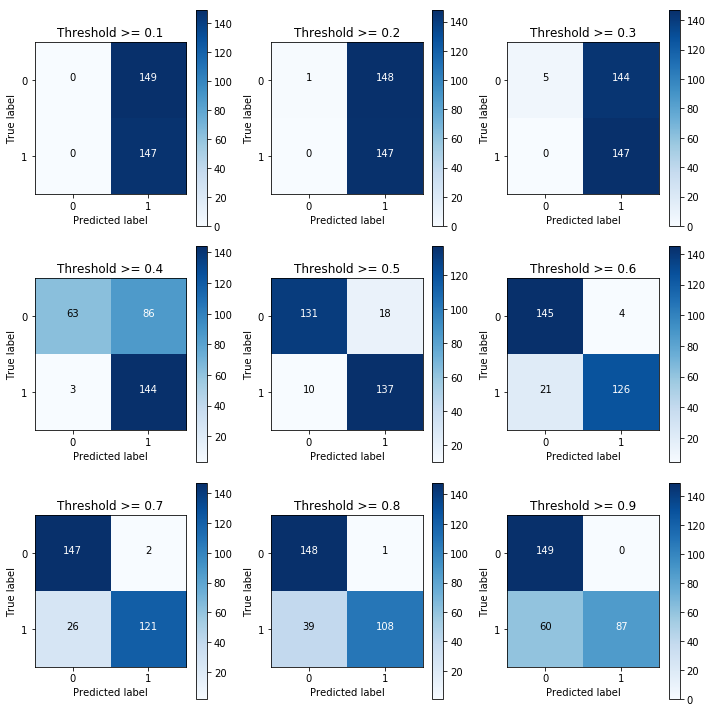

In [37]:
#==【改适下采样误杀率过高的情况，通过改sigmoid判断二分类的域值标准来找平衡】==
#predict取预测值改为取预测值相对的概率，比对概率与域值，用 predict_proba

lr = LogisticRegression(C =0.01,penalty ='l1')
lr.fit(X_train_under,y_train_under.values.ravel())
y_pred_under_proba = lr.predict_proba(X_test_under.values)
#predict_proba#预测 第 i 个预测样本为某个标签的概率，并且每一行的概率和为1。
#print(y_pred_under_proba)
#print(y_pred_under_proba[:,1])#取标签为1的概率，下面会用到，拿去和域值比较

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#域值，即sigmoid函数界定二个分类的临界值

#画图
plt.figure(figsize = (10,10))

j = 1#子图计数器
#遍历域值看每一个变化对应的recall值，并画混淆矩阵图
for i in thresholds:
    y_test_predictions_high_recall = y_pred_under_proba[:,1] > i
    #label为1的概率>第i号threshold的付给一个高如回率预测变量值

    plt.subplot(3,3,j)#画子图
    j += 1
    
    cnf_matrix_high_recall = confusion_matrix(y_test_under,y_test_predictions_high_recall)
    
    np.set_printoptions(precision=2)
    
    #打印召回率
    print("调域值下采样数据集召回率：",
         cnf_matrix_high_recall[1,1]/(cnf_matrix_high_recall[1,0]+cnf_matrix_high_recall[1,1]))
    
    #画图
    labels = [0,1]
    plot_confusion_matrix(cnf_matrix_high_recall,
                         classes = labels,
                         title='Threshold >= %s'%i)

'''
#分析上图
#图1 0.1 错杀很多 精度很低
#最后一个 0.9 错杀少 但63个没监测出来，精度也不高
#综合看0.5 0.6 是不错的
#【标准：要多评估比较，从实际出发 （比如根据实际中 精度和 recall 误杀等的指标要求）】

'''

In [54]:
#==【下面看过采样，补少分类到分类数值多的等量,用smote算法】==
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#imblearn安装 conda install imblearn失败，尝试以下
#conda install -c glemaitre imbalanced-learn
#或!pip install imblearn 未验证
#over_sampling过采样，under_sampling下采样


In [56]:
creditCdsDatas = pd.read_csv('creditcard.csv')
cols_indexs = creditCdsDatas.columns#返回列索引
#print(cols)
features_cols_indexs = cols_indexs.delete(len(cols_indexs)-1)
#delete删除除最后一个Classes外的列？并返回删除列索引
#print(features_cols)
features_X = creditCdsDatas[features_cols_indexs]
labels_y = creditCdsDatas['Class']

#对特征和label进行交叉验证train_test_split()
features_X_train, features_X_test,labels_y_train,labels_y_test = train_test_split(features_X,
                                                                                  labels_y,
                                                                                  test_size=0.2,
                                                                                 random_state=0)

#给Class 少的 label做过采样处理，直接SMOTE即可自动平衡数据，有多少个0就生成多少个1,原理见上面笔记
oversampler = SMOTE(random_state=0)#里面参数意为想每次生成的数都一样的。
#oversampler相当于SMOTE类 实例化的一个对象。
os_features,os_labels = oversampler.fit_sample(features_X_train,labels_y_train)
#.fit_sample(上面的交叉验证训练集x值，上面的交叉验证测试集结果集y值)
#【注意：是在train训练集进行补料，补成一样多，进行训练。测试集是拿原样的数据进行测的，所以一定是不动的，否则测出来就不准了】
#返回值是过采样的特征集和label集
#len(os_labels[os_labels==1])
#看下补后的labels 为1的个数，227454，和0齐平了，OK

227454

In [58]:
#下面操作同下采样
#print(os_features)#打印看是数组格式
#转为DataFrame格式才能用print_kfold_scores函数算best_c
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c_over = print_kfold_scores(os_features,os_labels)


----------
C param: 0.01
----------

循环迭代次数：  1 : recall score =  0.8903225806451613
循环迭代次数：  2 : recall score =  0.8947368421052632
循环迭代次数：  3 : recall score =  0.968861347792409
循环迭代次数：  4 : recall score =  0.9577714028203691
循环迭代次数：  5 : recall score =  0.958386915949484

平均 Recall score: 0.9340158178625373

----------
C param: 0.1
----------



G:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


循环迭代次数：  1 : recall score =  0.8903225806451613
循环迭代次数：  2 : recall score =  0.8947368421052632
循环迭代次数：  3 : recall score =  0.9700785658957619
循环迭代次数：  4 : recall score =  0.960112550972181
循环迭代次数：  5 : recall score =  0.9602994031720908

平均 Recall score: 0.9351099885580915

----------
C param: 1
----------

循环迭代次数：  1 : recall score =  0.8903225806451613
循环迭代次数：  2 : recall score =  0.8947368421052632
循环迭代次数：  3 : recall score =  0.970255615801704
循环迭代次数：  4 : recall score =  0.9603653510073532
循环迭代次数：  5 : recall score =  0.9606511249601565

平均 Recall score: 0.9352663029039278

----------
C param: 10
----------

循环迭代次数：  1 : recall score =  0.8903225806451613
循环迭代次数：  2 : recall score =  0.8947368421052632
循环迭代次数：  3 : recall score =  0.9705433218988603
循环迭代次数：  4 : recall score =  0.9604093162308613
循环迭代次数：  5 : recall score =  0.9607170727954188

平均 Recall score: 0.9353458267351129

----------
C param: 100
----------

循环迭代次数：  1 : recall score =  0.8903225806451613
循环迭代次数：  2 : re

过采样数据集召回率： 0.900990099009901


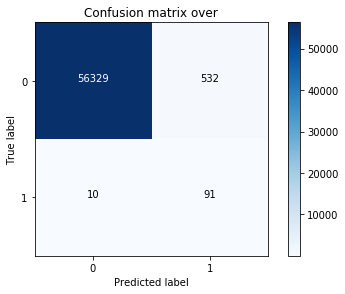

In [59]:
#代入best_c_over，逻辑回归fit predict
lr = LogisticRegression(C = best_c_over, penalty = 'l1')
lr.fit(os_features,os_labels.values.ravel())
y_pred_over = lr.predict(features_X_test.values)#用交插验证分得的特焉测试集,(只有分得的训练集进行了过采样处理，理由上面说过了)

cnf_matrix_over = confusion_matrix(labels_y_test,y_pred_over)#预测用交插验证分得的labels先算下。
np.set_printoptions(precision=2)
#打印recall召回率
print("过采样数据集召回率：",
     cnf_matrix_over[1,1]/(cnf_matrix_over[1,0]+cnf_matrix_over[1,1]))
#画混淆矩阵
labels = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_over,classes=labels,title='Confusion matrix over')
plt.show()
